## GloFAS 
https://www.globalfloods.eu   
https://www.globalfloods.eu/general-information/data-and-services/  

In [16]:
# common import
from IPython.display import Image

### WMS Service  
http://globalfloods-ows.ecmwf.int/glofas-ows/ows.py?  
http://www.globalfloods.eu/static/downloads/GloFAS-WMS-T_usermanual.pdf   

In [6]:
# import leaflet
from ipyleaflet import Map,WMSLayer,basemaps,WidgetControl
# import owslib
from owslib.wms import WebMapService

In [3]:
wms_url = 'http://globalfloods-ows.ecmwf.int/glofas-ows/ows.py?'
# Reporting Points: EPSG 3857
wms_layer = 'RPG_U'
m = Map(center=(0, -180), zoom=2,basemap=basemaps.Esri.WorldTopoMap)
wms1 = WMSLayer(
    url=wms_url,
    layers=wms_layer,
    transparent=True,
    format="image/png",
    version="1.3.0",
)
m.add_layer(wms1)
m

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}…

In [8]:
# load basic information of WMS service
wms = WebMapService(wms_url)
wms.identification.title
layers=list(wms.contents)
print(layers)

['GLOFAS_OWS', 'Static', 'date', 'FloodHazard100y', 'MajorRiverBasins', 'GlofasLakesReservoirs', 'GlofasReservoirImpact', 'UpstreamArea', 'MajorRivers1', 'MajorRivers2', 'MajorRivers3', 'MajorRivers4', 'MajorRivers5', 'MajorRivers6', 'AdministrativeRegions', 'ErrorMessage', 'Hydrological', 'RPG_U', 'RPGM', 'RPGH', 'RPGS', 'sumALHEGE', 'sumALEEGE', 'RPG80', 'rivermap_4mon', 'areamap_4mon', 'sumAL41EGE', 'sumAL42EGE', 'sumAL43EGE', 'Meteorological', 'EGE_probRgt300', 'EGE_probRgt150', 'EGE_probRgt50', 'AccRainEGE', 'RainAnimation', 'Flood risk', 'RapidImpactAssessment', 'RapidFloodMapping']


In [12]:
# info on RPG_U
layer = "RPG_U"
print(wms[layer].title)
print(wms[layer].boundingBox)
print(wms[layer].boundingBoxWGS84)
print(wms[layer].styles)

Reporting Points
(-20037500.0, -20049000.0, 20037500.0, 20049000.0, 'EPSG:3857')
(-180.0, -85.06, 180.0, 85.06)
{'default': {'title': 'default', 'legend': 'http://globalfloods-ows.ecmwf.int/glofas-ows/?version=1.1.1&service=WMS&request=GetLegendGraphic&layer=RPG_U&format=image/png&STYLE=default'}}


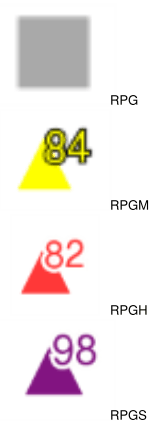

In [21]:
# load legend
legend_url = wms[layer].styles['default']['legend']
legend_image=Image(legend_url,format='png',height=100)
display(legend_image)